In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/archive/chest_xray/chest_xray'

print("Dataset Path")
print("" * 40)
print(f"Dataset path: {base_path}")
if os.path.exists(base_path):
    print(" Dataset found!")
    print("\n Folder structure:")
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path):
            print(f"{item}/")
            for sub_item in os.listdir(item_path):
                print(f"{sub_item}/")
else:
    print(" Dataset not found!")
    print("Available paths in archive:")
    archive_path = '/content/drive/MyDrive/archive'
    if os.path.exists(archive_path):
        for item in os.listdir(archive_path):
            print(f"{item}")

Dataset Path

Dataset path: /content/drive/MyDrive/archive/chest_xray/chest_xray
 Dataset found!

 Folder structure:
test/
.DS_Store/
NORMAL/
PNEUMONIA/
train/
.DS_Store/
NORMAL/
PNEUMONIA/
val/
.DS_Store/
NORMAL/
PNEUMONIA/


In [ ]:
def count_images_in_folder(folder_path, class_name):
    """Count images in a specific class folder"""
    class_path = os.path.join(folder_path, class_name)
    if os.path.exists(class_path):
        image_files = [f for f in os.listdir(class_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        count = len(image_files)
        print(f"  {class_name}: {count} images")
        return count
    else:
        print(f"  {class_name}: Folder not found")
        return 0
print("Image counting function defined!")

Image counting function defined!


In [ ]:
import os, shutil, random

# Paths
base_path = '/content/drive/MyDrive/archive/chest_xray/chest_xray'
train_normal = os.path.join(base_path, 'train', 'NORMAL')
train_pneumonia = os.path.join(base_path, 'train', 'PNEUMONIA')
val_normal = os.path.join(base_path, 'val', 'NORMAL')
val_pneumonia = os.path.join(base_path, 'val', 'PNEUMONIA')

# Ensure validation dirs exist
os.makedirs(val_normal, exist_ok=True)
os.makedirs(val_pneumonia, exist_ok=True)

def move_images(src, dst, target_count):
    """Move random images from src to dst until dst has target_count images."""
    current_count = len(os.listdir(dst))
    needed = target_count - current_count
    if needed <= 0:
        print(f"{dst} already has {current_count} images (>= {target_count}). Skipping.")
        return

    candidates = os.listdir(src)
    to_move = random.sample(candidates, needed)
    for f in to_move:
        shutil.move(os.path.join(src, f), os.path.join(dst, f))
    print(f"Moved {needed} images from {src} → {dst} (now has {len(os.listdir(dst))})")

# Move enough images to reach 100 NORMAL and 120 PNEUMONIA in val
move_images(train_normal, val_normal, 100)
move_images(train_pneumonia, val_pneumonia, 120)

print("Validation set resized successfully!")


/content/drive/MyDrive/archive/chest_xray/chest_xray/val/NORMAL already has 100 images (>= 100). Skipping.
/content/drive/MyDrive/archive/chest_xray/chest_xray/val/PNEUMONIA already has 120 images (>= 120). Skipping.
Validation set resized successfully!


In [ ]:
print("Counting Images in Dataset")
print("" * 40)
splits = ['train', 'test', 'val']
results = {}
for split in splits:
    split_path = os.path.join(base_path, split)
    print(f"\nCounting {split.upper()} images:")
    normal_count = count_images_in_folder(split_path, 'NORMAL')
    pneumonia_count = count_images_in_folder(split_path, 'PNEUMONIA')
    results[split] = {
        'normal': normal_count,
        'pneumonia': pneumonia_count,
        'total': normal_count + pneumonia_count
    }
total_normal = sum([results[split]['normal'] for split in splits])
total_pneumonia = sum([results[split]['pneumonia'] for split in splits])
total_images = total_normal + total_pneumonia

print(f"\nOVERALL TOTALS:")
print(f"Normal: {total_normal:,}")
print(f"Pneumonia: {total_pneumonia:,}")
print(f"Total: {total_images:,}")

if total_images > 0:
    print(f"Normal percentage: {total_normal/total_images*100:.1f}%")
    print(f"Pneumonia percentage: {total_pneumonia/total_images*100:.1f}%")
    print(f"Class imbalance ratio: 1:{total_pneumonia/total_normal:.1f}")

Counting Images in Dataset


Counting TRAIN images:
  NORMAL: 1250 images
  PNEUMONIA: 3764 images

Counting TEST images:
  NORMAL: 234 images
  PNEUMONIA: 390 images

Counting VAL images:
  NORMAL: 99 images
  PNEUMONIA: 119 images

OVERALL TOTALS:
Normal: 1,583
Pneumonia: 4,273
Total: 5,856
Normal percentage: 27.0%
Pneumonia percentage: 73.0%
Class imbalance ratio: 1:2.7


In [ ]:
print("STEP 5: Creating Summary Table")
print("" * 40)
summary_data = {
    'Split': ['Train', 'Test', 'Validation', 'Total'],
    'Normal': [
        results['train']['normal'],
        results['test']['normal'],
        results['val']['normal'],
        total_normal
    ],
    'Pneumonia': [
        results['train']['pneumonia'],
        results['test']['pneumonia'],
        results['val']['pneumonia'],
        total_pneumonia
    ],
    'Total': [
        results['train']['total'],
        results['test']['total'],
        results['val']['total'],
        total_images
    ]
}
df_summary = pd.DataFrame(summary_data)
print("Dataset Summary Table:")
print(df_summary.to_string(index=False))
df_summary.to_csv('dataset_summary.csv', index=False)
print("\nSummary saved as 'dataset_summary.csv'")

STEP 5: Creating Summary Table

Dataset Summary Table:
     Split  Normal  Pneumonia  Total
     Train    1250       3764   5014
      Test     234        390    624
Validation      99        119    218
     Total    1583       4273   5856

Summary saved as 'dataset_summary.csv'


Pie Chart



Text(0.5, 1.0, 'Overall Class Distribution')

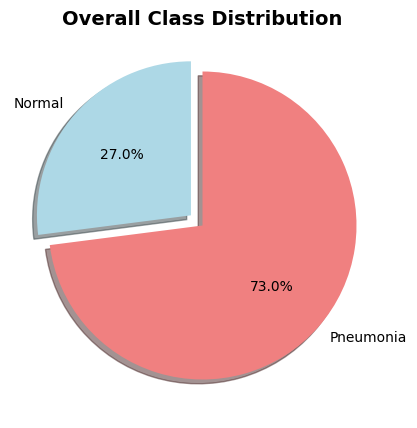

In [ ]:
print("Pie Chart")
print("" * 40)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels = ['Normal', 'Pneumonia']
sizes = [total_normal, total_pneumonia]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        explode=explode, shadow=True, startangle=90)
plt.title('Overall Class Distribution', fontweight='bold', fontsize=14)

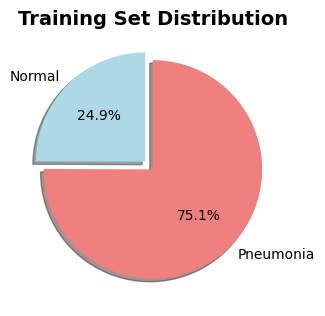

In [ ]:
plt.subplot(1, 2, 2)
train_sizes = [results['train']['normal'], results['train']['pneumonia']]
plt.pie(train_sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        explode=explode, shadow=True, startangle=90)
plt.title('Training Set Distribution', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

Bar Charts



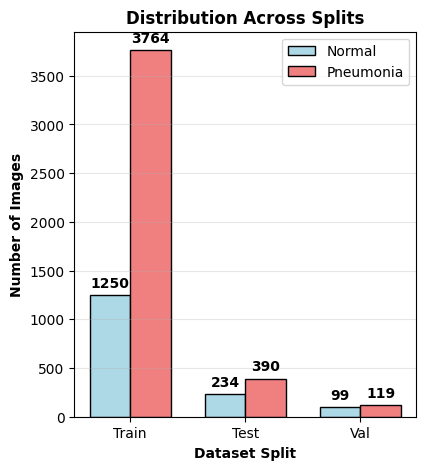

In [ ]:
print("Bar Charts")
print("" * 40)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
split_names = ['Train', 'Test', 'Val']
normal_counts = [results['train']['normal'], results['test']['normal'], results['val']['normal']]
pneumonia_counts = [results['train']['pneumonia'], results['test']['pneumonia'], results['val']['pneumonia']]
x = np.arange(len(split_names))
width = 0.35
bars1 = plt.bar(x - width/2, normal_counts, width, label='Normal', color='lightblue', edgecolor='black')
bars2 = plt.bar(x + width/2, pneumonia_counts, width, label='Pneumonia', color='lightcoral', edgecolor='black')
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
plt.xlabel('Dataset Split', fontweight='bold')
plt.ylabel('Number of Images', fontweight='bold')
plt.title('Distribution Across Splits', fontweight='bold')
plt.xticks(x, split_names)
plt.legend()
plt.grid(axis='y', alpha=0.3)

In [ ]:
def load_sample_images(base_path, num_samples=3):
    """Load sample images from each class"""
    samples = {'NORMAL': [], 'PNEUMONIA': []}
    train_path = os.path.join(base_path, 'train')
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_path = os.path.join(train_path, class_name)
        print(f"Loading {class_name} samples from: {class_path}")
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            for i in range(min(num_samples, len(image_files))):
                img_path = os.path.join(class_path, image_files[i])
                try:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, (256, 256))
                        samples[class_name].append(img_resized)
                        print(f" Loaded {class_name} sample {i+1}")
                    else:
                        pil_img = Image.open(img_path).convert('L')
                        img_array = np.array(pil_img)
                        img_resized = cv2.resize(img_array, (256, 256))
                        samples[class_name].append(img_resized)
                        print(f" Loaded {class_name} sample {i+1} with PIL")
                except Exception as e:
                    print(f"Error loading {class_name} sample {i+1}: {e}")
        else:
            print(f"Path not found: {class_path}")

    return samples

print("Sample image loading function defined!")

Sample image loading function defined!


Loading and Displaying Sample Images

Loading NORMAL samples from: /content/drive/MyDrive/archive/chest_xray/chest_xray/train/NORMAL
 Loaded NORMAL sample 1
 Loaded NORMAL sample 2
 Loaded NORMAL sample 3
Loading PNEUMONIA samples from: /content/drive/MyDrive/archive/chest_xray/chest_xray/train/PNEUMONIA
 Loaded PNEUMONIA sample 1
 Loaded PNEUMONIA sample 2
 Loaded PNEUMONIA sample 3


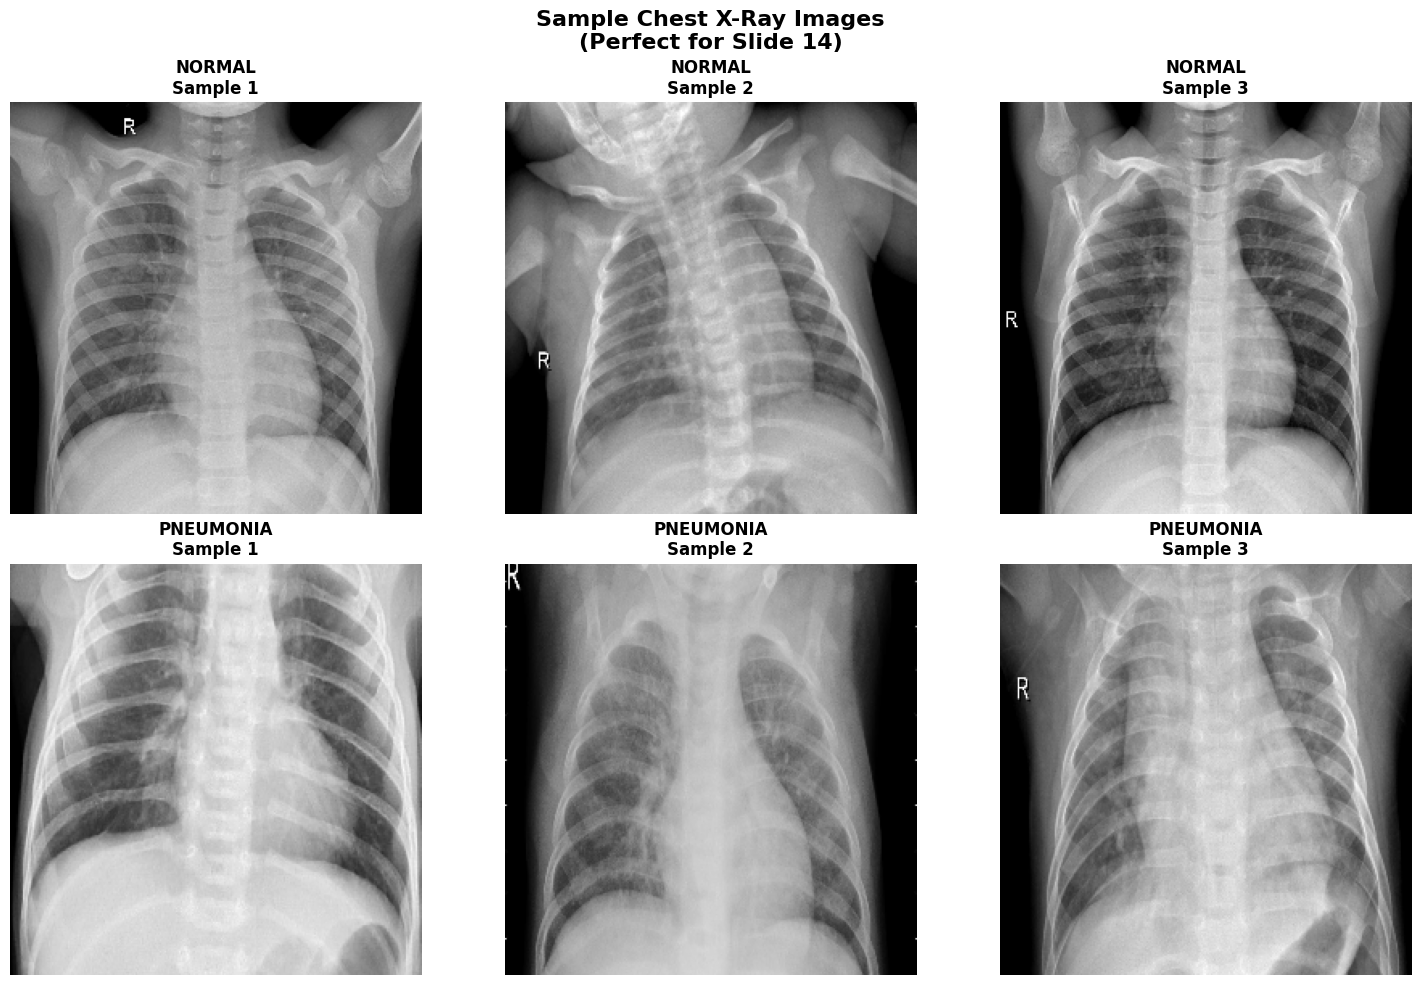

In [ ]:
print("Loading and Displaying Sample Images")
print("" * 40)
sample_images = load_sample_images(base_path, num_samples=3)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
classes = ['NORMAL', 'PNEUMONIA']
for row, class_name in enumerate(classes):
    images = sample_images[class_name]
    for col in range(3):
        if col < len(images):
            axes[row, col].imshow(images[col], cmap='gray')
            axes[row, col].set_title(f'{class_name}\nSample {col + 1}',
                                   fontweight='bold', fontsize=12)
            axes[row, col].axis('off')
        else:
            axes[row, col].text(0.5, 0.5, f'{class_name}\nNo Image\nAvailable',
                              ha='center', va='center',
                              transform=axes[row, col].transAxes,
                              fontsize=10, fontweight='bold')
            axes[row, col].axis('off')
plt.suptitle('Sample Chest X-Ray Images\n(Perfect for Slide 14)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
def analyze_image_dimensions(base_path, sample_size=100):
    """Analyze dimensions of sample images"""
    dimensions = []
    file_sizes = []
    train_path = os.path.join(base_path, 'train')
    print(f"Analyzing dimensions from: {train_path}")
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_path = os.path.join(train_path, class_name)
        if os.path.exists(class_path):
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            sample_files = image_files[:sample_size//2]
            print(f"Analyzing {len(sample_files)} {class_name} images...")
            for file in sample_files:
                file_path = os.path.join(class_path, file)
                try:
                    with Image.open(file_path) as img:
                        dimensions.append(img.size)
                    file_size = os.path.getsize(file_path) / (1024 * 1024)
                    file_sizes.append(file_size)
                except Exception as e:
                    continue
    print(f"Analyzed {len(dimensions)} images")
    return dimensions, file_sizes
print("Dimension analysis function defined!")

Dimension analysis function defined!


In [ ]:
print("Analyzing Image Dimensions")
print("" * 40)
dimensions, file_sizes = analyze_image_dimensions(base_path, sample_size=100)

if dimensions:
    widths, heights = zip(*dimensions)

    # Print basic statistics
    print(" BASIC STATISTICS:")
    print(f"Number of images analyzed: {len(dimensions)}")
    print(f"Width  - Min: {min(widths):4d}px | Max: {max(widths):4d}px | Mean: {np.mean(widths):6.1f}px")
    print(f"Height - Min: {min(heights):4d}px | Max: {max(heights):4d}px | Mean: {np.mean(heights):6.1f}px")
    print(f"Size   - Min: {min(file_sizes):4.2f}MB | Max: {max(file_sizes):4.2f}MB | Mean: {np.mean(file_sizes):6.2f}MB")

    # Find most common dimensions
    dimension_counts = Counter(dimensions)
    most_common = dimension_counts.most_common(5)
    print(f"\n MOST COMMON DIMENSIONS:")
    for (w, h), count in most_common:
        print(f"  {w}×{h}: {count} images ({count/len(dimensions)*100:.1f}%)")
else:
    print(" No dimensions could be analyzed")

Analyzing Image Dimensions

Analyzing dimensions from: /content/drive/MyDrive/archive/chest_xray/chest_xray/train
Analyzing 50 NORMAL images...
Analyzing 50 PNEUMONIA images...
Analyzed 100 images
 BASIC STATISTICS:
Number of images analyzed: 100
Width  - Min:  699px | Max: 2890px | Mean: 1402.1px
Height - Min:  424px | Max: 2534px | Mean: 1067.1px
Size   - Min: 0.02MB | Max: 1.61MB | Mean:   0.32MB

 MOST COMMON DIMENSIONS:
  2226×2013: 1 images (1.0%)
  1284×1013: 1 images (1.0%)
  1936×1669: 1 images (1.0%)
  1582×1056: 1 images (1.0%)
  2090×1785: 1 images (1.0%)


Creating Dimension Plots


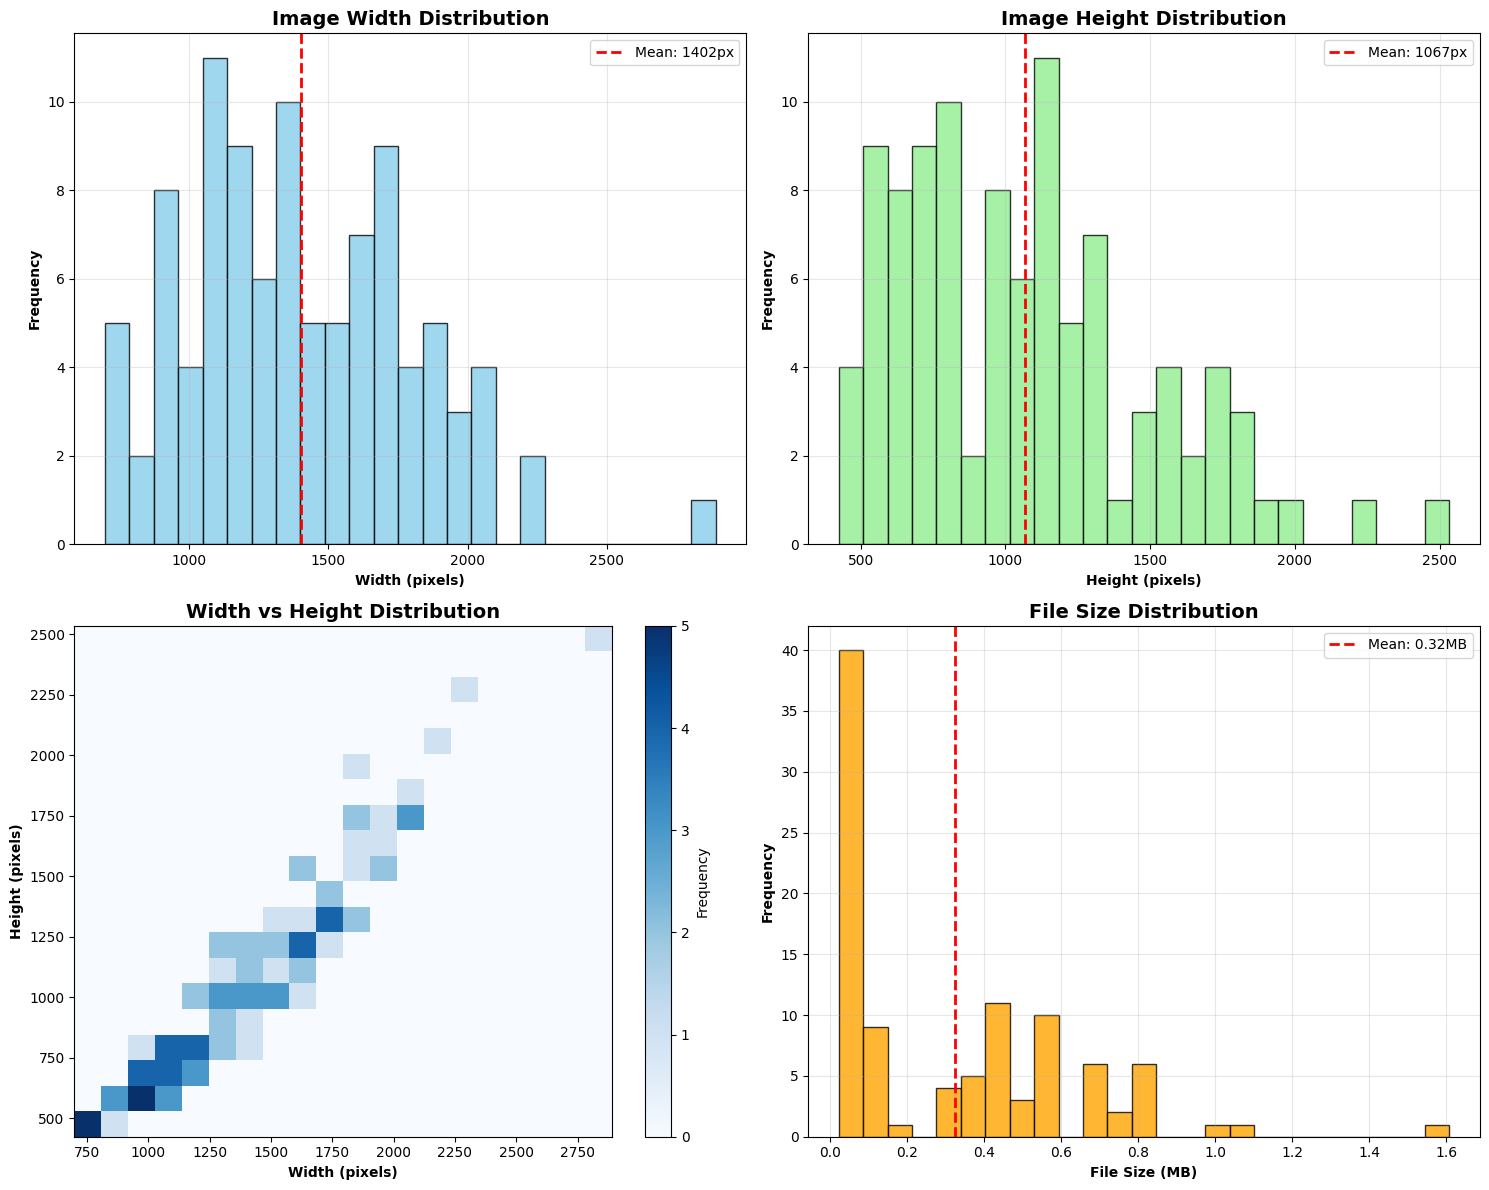

Dimension analysis plots created!


In [ ]:
print("Creating Dimension Plots")
print("=" * 40)
if dimensions:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes[0, 0].hist(widths, bins=25, alpha=0.8, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Width (pixels)', fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontweight='bold')
    axes[0, 0].set_title('Image Width Distribution', fontweight='bold', fontsize=14)
    axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2,
                       label=f'Mean: {np.mean(widths):.0f}px')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    axes[0, 1].hist(heights, bins=25, alpha=0.8, color='lightgreen', edgecolor='black')
    axes[0, 1].set_xlabel('Height (pixels)', fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontweight='bold')
    axes[0, 1].set_title('Image Height Distribution', fontweight='bold', fontsize=14)
    axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2,
                       label=f'Mean: {np.mean(heights):.0f}px')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    h = axes[1, 0].hist2d(widths, heights, bins=20, cmap='Blues')
    axes[1, 0].set_xlabel('Width (pixels)', fontweight='bold')
    axes[1, 0].set_ylabel('Height (pixels)', fontweight='bold')
    axes[1, 0].set_title('Width vs Height Distribution', fontweight='bold', fontsize=14)
    plt.colorbar(h[3], ax=axes[1, 0], label='Frequency')
    axes[1, 1].hist(file_sizes, bins=25, alpha=0.8, color='orange', edgecolor='black')
    axes[1, 1].set_xlabel('File Size (MB)', fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontweight='bold')
    axes[1, 1].set_title('File Size Distribution', fontweight='bold', fontsize=14)
    axes[1, 1].axvline(np.mean(file_sizes), color='red', linestyle='--', linewidth=2,
                       label=f'Mean: {np.mean(file_sizes):.2f}MB')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("Dimension analysis plots created!")

In [ ]:
print("Pixel Intensity Analysis")
print("" * 40)
def analyze_pixel_intensity(base_path, sample_size=30):
    """Analyze pixel intensity distributions"""
    intensities_normal = []
    intensities_pneumonia = []
    mean_intensities_normal = []
    mean_intensities_pneumonia = []
    train_path = os.path.join(base_path, 'train')
    normal_path = os.path.join(train_path, 'NORMAL')
    if os.path.exists(normal_path):
        files = [f for f in os.listdir(normal_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        files = files[:sample_size]
        print(f"Analyzing {len(files)} normal images...")
        for file in files:
            img_path = os.path.join(normal_path, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (256, 256))
                    intensities_normal.extend(img.flatten())
                    mean_intensities_normal.append(np.mean(img))
            except Exception:
                continue
    pneumonia_path = os.path.join(train_path, 'PNEUMONIA')
    if os.path.exists(pneumonia_path):
        files = [f for f in os.listdir(pneumonia_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        files = files[:sample_size]
        print(f"Analyzing {len(files)} pneumonia images...")
        for file in files:
            img_path = os.path.join(pneumonia_path, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (256, 256))
                    intensities_pneumonia.extend(img.flatten())
                    mean_intensities_pneumonia.append(np.mean(img))
            except Exception:
                continue
    return (intensities_normal, intensities_pneumonia,
            mean_intensities_normal, mean_intensities_pneumonia)
(intensities_normal, intensities_pneumonia,
 mean_intensities_normal, mean_intensities_pneumonia) = analyze_pixel_intensity(base_path)

print(f"Intensity analysis complete!")
print(f"Normal images: {len(mean_intensities_normal)} analyzed")
print(f"Pneumonia images: {len(mean_intensities_pneumonia)} analyzed")

Pixel Intensity Analysis

Analyzing 30 normal images...
Analyzing 30 pneumonia images...
Intensity analysis complete!
Normal images: 30 analyzed
Pneumonia images: 30 analyzed


Creating Intensity Plots



/tmp/ipython-input-3698560438.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[1, 0].boxplot(data_to_plot, labels=['Normal', 'Pneumonia'],


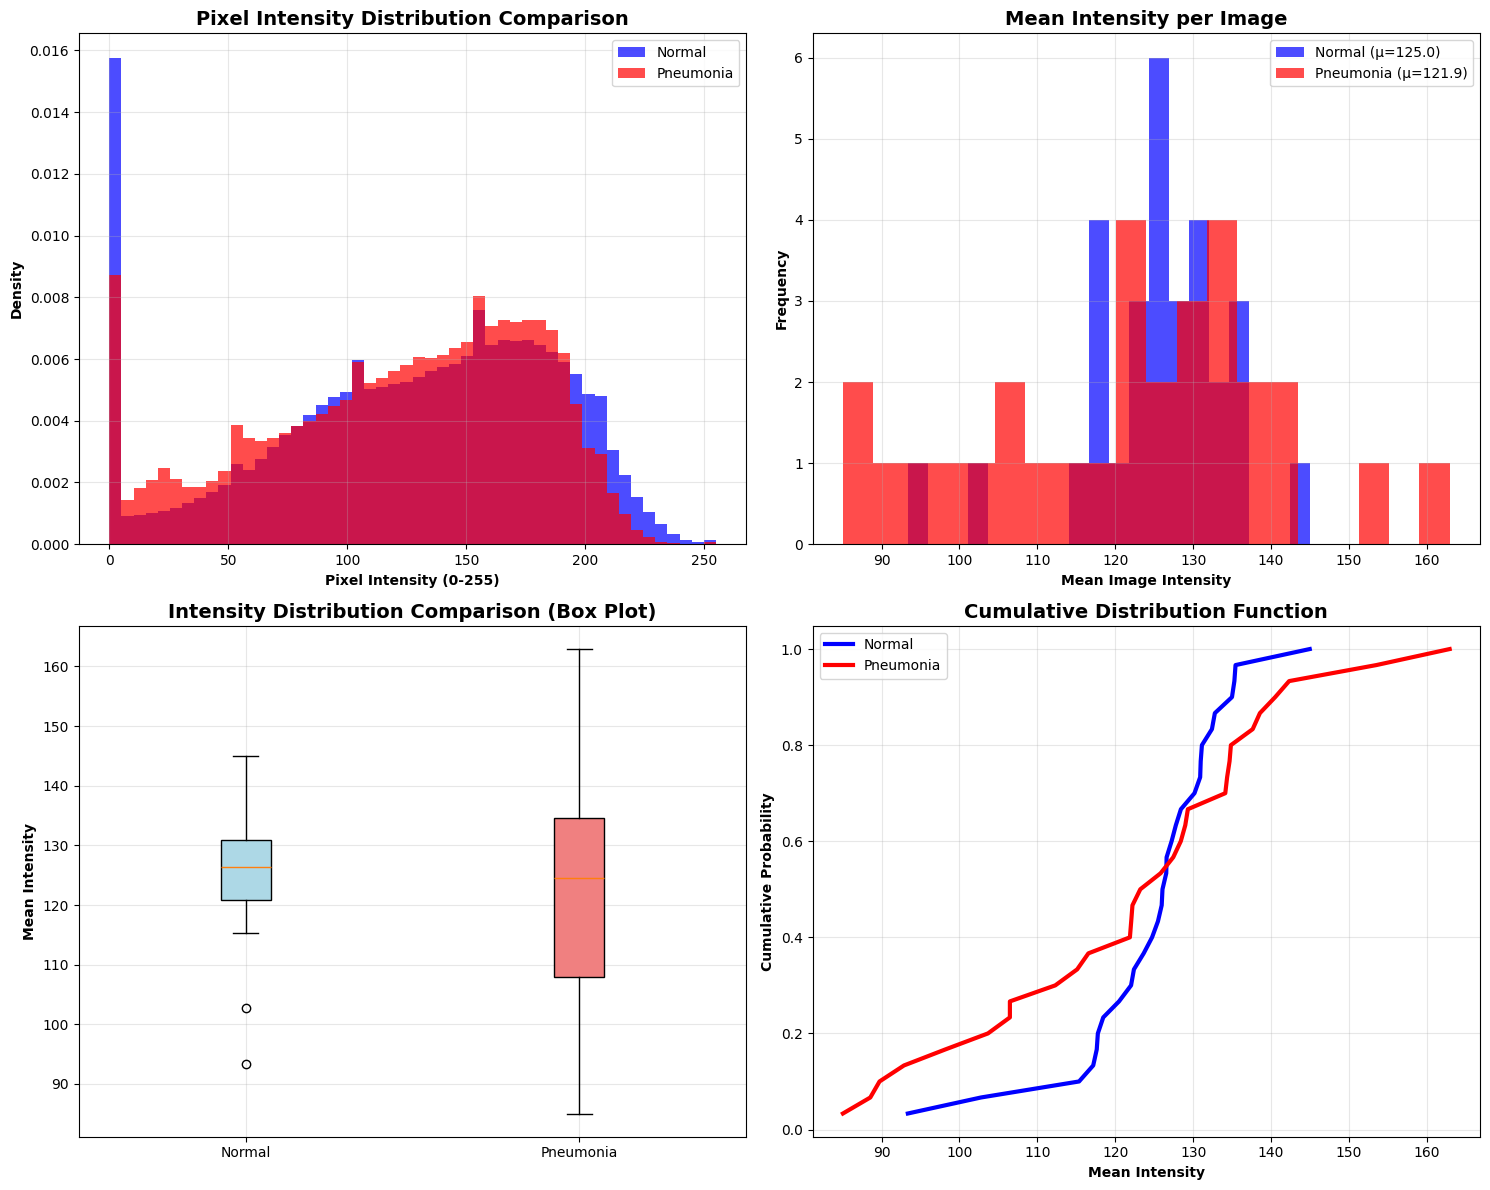

In [ ]:
print("Creating Intensity Plots")
print("" * 40)

if intensities_normal and intensities_pneumonia:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes[0, 0].hist(intensities_normal, bins=50, alpha=0.7, color='blue',
                    density=True, label='Normal')
    axes[0, 0].hist(intensities_pneumonia, bins=50, alpha=0.7, color='red',
                    density=True, label='Pneumonia')
    axes[0, 0].set_xlabel('Pixel Intensity (0-255)', fontweight='bold')
    axes[0, 0].set_ylabel('Density', fontweight='bold')
    axes[0, 0].set_title('Pixel Intensity Distribution Comparison', fontweight='bold', fontsize=14)
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    axes[0, 1].hist(mean_intensities_normal, bins=20, alpha=0.7, color='blue',
                    label=f'Normal (μ={np.mean(mean_intensities_normal):.1f})')
    axes[0, 1].hist(mean_intensities_pneumonia, bins=20, alpha=0.7, color='red',
                    label=f'Pneumonia (μ={np.mean(mean_intensities_pneumonia):.1f})')
    axes[0, 1].set_xlabel('Mean Image Intensity', fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontweight='bold')
    axes[0, 1].set_title('Mean Intensity per Image', fontweight='bold', fontsize=14)
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    data_to_plot = [mean_intensities_normal, mean_intensities_pneumonia]
    box_plot = axes[1, 0].boxplot(data_to_plot, labels=['Normal', 'Pneumonia'],
                                  patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][1].set_facecolor('lightcoral')
    axes[1, 0].set_ylabel('Mean Intensity', fontweight='bold')
    axes[1, 0].set_title('Intensity Distribution Comparison (Box Plot)', fontweight='bold', fontsize=14)
    axes[1, 0].grid(alpha=0.3)
    x_normal = np.sort(mean_intensities_normal)
    y_normal = np.arange(1, len(x_normal) + 1) / len(x_normal)
    x_pneumonia = np.sort(mean_intensities_pneumonia)
    y_pneumonia = np.arange(1, len(x_pneumonia) + 1) / len(x_pneumonia)

    axes[1, 1].plot(x_normal, y_normal, color='blue', linewidth=3, label='Normal')
    axes[1, 1].plot(x_pneumonia, y_pneumonia, color='red', linewidth=3, label='Pneumonia')
    axes[1, 1].set_xlabel('Mean Intensity', fontweight='bold')
    axes[1, 1].set_ylabel('Cumulative Probability', fontweight='bold')
    axes[1, 1].set_title('Cumulative Distribution Function', fontweight='bold', fontsize=14)
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
    print("INTENSITY STATISTICS:")
    print(f"Normal    - Mean: {np.mean(intensities_normal):6.1f} | Std: {np.std(intensities_normal):6.1f}")
    print(f"Pneumonia - Mean: {np.mean(intensities_pneumonia):6.1f} | Std: {np.std(intensities_pneumonia):6.1f}")
    print(f"\nPer-Image Mean Intensities:")
    print(f"Normal    - Mean: {np.mean(mean_intensities_normal):6.1f} | Std: {np.std(mean_intensities_normal):6.1f}")
    print(f"Pneumonia - Mean: {np.mean(mean_intensities_pneumonia):6.1f} | Std: {np.std(mean_intensities_pneumonia):6.1f}")

    # Statistical significance test
    try:
        from scipy import stats
        t_stat, p_value = stats.ttest_ind(mean_intensities_normal, mean_intensities_pneumonia)
        print(f"\n Statistical Test (t-test):")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.6f}")
        if p_value < 0.05:
            print(" Statistically significant difference in intensities (p < 0.05)")
        else:
            print("No statistically significant difference in intensities (p ≥ 0.05)")
    except ImportError:
        print("Install scipy for statistical tests: !pip install scipy")

    print("Intensity analysis plots created!")

INTENSITY STATISTICS:
Normal    - Mean:  125.0 | Std:   61.5
Pneumonia - Mean:  121.9 | Std:   57.1

Per-Image Mean Intensities:
Normal    - Mean:  125.0 | Std:    9.7
Pneumonia - Mean:  121.9 | Std:   18.9

 Statistical Test (t-test):
t-statistic: 0.7703
p-value: 0.444248
No statistically significant difference in intensities (p ≥ 0.05)
Intensity analysis plots created!


In [ ]:
print("Final Summary")
print("" * 40)

print(" EDA ANALYSIS COMPLETE!")
print("\n DATASET SUMMARY FOR YOUR PRESENTATION:")
print(f"• Total Images: {total_images:,}")
print(f"• Training: {results['train']['total']:,} images")
print(f"• Test: {results['test']['total']:,} images")
print(f"• Validation: {results['val']['total']:,} images")
print(f"• Normal: {total_normal:,} ({total_normal/total_images*100:.1f}%)")
print(f"• Pneumonia: {total_pneumonia:,} ({total_pneumonia/total_images*100:.1f}%)")
print(f"• Class Imbalance: 1:{total_pneumonia/total_normal:.1f} (Normal:Pneumonia)")

if dimensions:
    print(f"• Average Image Size: {np.mean(widths):.0f} × {np.mean(heights):.0f} pixels")
    print(f"• Average File Size: {np.mean(file_sizes):.2f} MB")

print("Dataset Overview:")
print(f"""
# Key Statistics:
# Total Images: {total_images:,}
# Normal: {total_normal:,} ({total_normal/total_images*100:.1f}%)
# Pneumonia: {total_pneumonia:,} ({total_pneumonia/total_images*100:.1f}%)
# Class Imbalance: 1:{total_pneumonia/total_normal:.1f}
""")

Final Summary

 EDA ANALYSIS COMPLETE!

 DATASET SUMMARY FOR YOUR PRESENTATION:
• Total Images: 5,856
• Training: 5,014 images
• Test: 624 images
• Validation: 218 images
• Normal: 1,583 (27.0%)
• Pneumonia: 4,273 (73.0%)
• Class Imbalance: 1:2.7 (Normal:Pneumonia)
• Average Image Size: 1402 × 1067 pixels
• Average File Size: 0.32 MB
Dataset Overview:

# Key Statistics:
# Total Images: 5,856
# Normal: 1,583 (27.0%)
# Pneumonia: 4,273 (73.0%)
# Class Imbalance: 1:2.7



In [ ]:
print("STEP 5: Creating Summary Table")
print("" * 40)
summary_data = {
    'Split': ['Train', 'Test', 'Validation', 'Total'],
    'Normal': [
        results['train']['normal'],
        results['test']['normal'],
        results['val']['normal'],
        total_normal
    ],
    'Pneumonia': [
        results['train']['pneumonia'],
        results['test']['pneumonia'],
        results['val']['pneumonia'],
        total_pneumonia
    ],
    'Total': [
        results['train']['total'],
        results['test']['total'],
        results['val']['total'],
        total_images
    ]
}
df_summary = pd.DataFrame(summary_data)
print("Dataset Summary Table:")
print(df_summary.to_string(index=False))
df_summary.to_csv('dataset_summary.csv', index=False)
print("\nSummary saved as 'dataset_summary.csv'")


STEP 5: Creating Summary Table

Dataset Summary Table:
     Split  Normal  Pneumonia  Total
     Train    1250       3764   5014
      Test     234        390    624
Validation      99        119    218
     Total    1583       4273   5856

Summary saved as 'dataset_summary.csv'


#### Preprocessing

In [ ]:
import os, cv2, random, joblib, gc, numpy as np
from tqdm import tqdm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)

from skimage.feature import hog, local_binary_pattern
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
BASE_PATH = '/content/drive/MyDrive/archive/chest_xray/chest_xray'
IMG_SIZE = 128
MODEL_DIR = "/content/drive/MyDrive/capstone_models"
os.makedirs(MODEL_DIR, exist_ok=True)


In [ ]:
def _load_one_folder(folder, label, img_size=IMG_SIZE):
    items = []
    for fn in os.listdir(folder):
        p = os.path.join(folder, fn)
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
        img = img.astype(np.float32) / 255.0
        items.append((img, label))
    return items

def load_split(split, base=BASE_PATH):
    split_dir = os.path.join(base, split)
    data = []
    data += _load_one_folder(os.path.join(split_dir, "PNEUMONIA"), 1)
    data += _load_one_folder(os.path.join(split_dir, "NORMAL"),    0)
    random.shuffle(data)
    X = np.array([d[0] for d in data], dtype=np.float32)[..., None]  # (N,H,W,1)
    y = np.array([d[1] for d in data], dtype=np.int64)
    return X, y

X_train, y_train = load_split("train")
X_val,   y_val   = load_split("val")
X_test,  y_test  = load_split("test")

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,   y_val.shape)
print("Test :", X_test.shape,  y_test.shape)


Train: (5014, 128, 128, 1) (5014,)
Val  : (218, 128, 128, 1) (218,)
Test : (624, 128, 128, 1) (624,)


In [ ]:
def extract_hog(batch, img_size=IMG_SIZE):
    feats = []
    for im in tqdm(batch, desc="HOG"):
        im2d = im.squeeze()  # (H,W)
        f = hog(im2d,
                orientations=9,
                pixels_per_cell=(8,8),
                cells_per_block=(2,2),
                block_norm='L2-Hys',
                feature_vector=True)
        feats.append(f)
    return np.asarray(feats, dtype=np.float32)

def extract_lbp(batch, P=8, R=1):
    feats = []
    n_bins = P + 2
    for im in tqdm(batch, desc="LBP"):
        im2d = im.squeeze()
        lbp = local_binary_pattern(im2d, P=P, R=R, method='uniform')
        hist, _ = np.histogram(lbp.ravel(),
                               bins=np.arange(0, n_bins + 1),
                               range=(0, n_bins),
                               density=True)
        feats.append(hist.astype(np.float32))
    return np.asarray(feats, dtype=np.float32)

print("Extracting HOG…")
Xtr_hog = extract_hog(X_train); Xv_hog = extract_hog(X_val); Xte_hog = extract_hog(X_test)
print("HOG:", Xtr_hog.shape, Xv_hog.shape, Xte_hog.shape)

print("Extracting LBP…")
Xtr_lbp = extract_lbp(X_train); Xv_lbp = extract_lbp(X_val); Xte_lbp = extract_lbp(X_test)
print("LBP:", Xtr_lbp.shape, Xv_lbp.shape, Xte_lbp.shape)


Extracting HOG…


HOG: 100%|██████████| 624/624 [00:03<00:00, 172.08it/s]


HOG: (5014, 8100) (218, 8100) (624, 8100)
Extracting LBP…


LBP:   0%|          | 0/5014 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
LBP: 100%|██████████| 624/624 [00:01<00:00, 321.24it/s]

LBP: (5014, 10) (218, 10) (624, 10)


In [ ]:
def evaluate(model, X, y, name):
    y_pred = model.predict(X)
    print(f"\n[{name}]")
    print(classification_report(y, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y, y_pred))

    # AUCs if we can get scores
    y_score = None
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X)[:,1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X)

    if y_score is not None:
        try:
            print("ROC-AUC:", roc_auc_score(y, y_score).round(4),
                  "| PR-AUC:", average_precision_score(y, y_score).round(4))
        except Exception:
            pass

In [ ]:
# BASELINE A: SVM (linear) on HOG
svm_hog = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svm", SVC(kernel="linear",
                class_weight="balanced",
                probability=True,
                random_state=SEED))
])

svm_hog.fit(Xtr_hog, y_train)
evaluate(svm_hog, Xv_hog,  y_val,  "VAL - SVM(HOG)")
evaluate(svm_hog, Xte_hog, y_test, "TEST - SVM(HOG)")

joblib.dump(svm_hog, os.path.join(MODEL_DIR, "svm_hog.joblib"))



[VAL - SVM(HOG)]
              precision    recall  f1-score   support

           0     0.9794    0.9596    0.9694        99
           1     0.9669    0.9832    0.9750       119

    accuracy                         0.9725       218
   macro avg     0.9732    0.9714    0.9722       218
weighted avg     0.9726    0.9725    0.9725       218

Confusion matrix:
 [[ 95   4]
 [  2 117]]
ROC-AUC: 0.9985 | PR-AUC: 0.9988

[TEST - SVM(HOG)]
              precision    recall  f1-score   support

           0     0.9294    0.3376    0.4953       234
           1     0.7124    0.9846    0.8267       390

    accuracy                         0.7420       624
   macro avg     0.8209    0.6611    0.6610       624
weighted avg     0.7938    0.7420    0.7024       624

Confusion matrix:
 [[ 79 155]
 [  6 384]]
ROC-AUC: 0.9324 | PR-AUC: 0.9594


['/content/drive/MyDrive/capstone_models/svm_hog.joblib']

In [ ]:
# BASELINE C: SVM (RBF) on LBP
svm_lbp = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf",
                gamma="scale",
                class_weight="balanced",
                probability=True,
                random_state=SEED))
])

svm_lbp.fit(Xtr_lbp, y_train)
evaluate(svm_lbp, Xv_lbp,  y_val,  "VAL - SVM(LBP)")
evaluate(svm_lbp, Xte_lbp, y_test, "TEST - SVM(LBP)")

joblib.dump(svm_lbp, os.path.join(MODEL_DIR, "svm_lbp.joblib"))



[VAL - SVM(LBP)]
              precision    recall  f1-score   support

           0     0.8462    0.8889    0.8670        99
           1     0.9035    0.8655    0.8841       119

    accuracy                         0.8761       218
   macro avg     0.8748    0.8772    0.8756       218
weighted avg     0.8775    0.8761    0.8763       218

Confusion matrix:
 [[ 88  11]
 [ 16 103]]
ROC-AUC: 0.9506 | PR-AUC: 0.9614

[TEST - SVM(LBP)]
              precision    recall  f1-score   support

           0     0.7624    0.6581    0.7064       234
           1     0.8104    0.8769    0.8424       390

    accuracy                         0.7949       624
   macro avg     0.7864    0.7675    0.7744       624
weighted avg     0.7924    0.7949    0.7914       624

Confusion matrix:
 [[154  80]
 [ 48 342]]
ROC-AUC: 0.8388 | PR-AUC: 0.8816


['/content/drive/MyDrive/capstone_models/svm_lbp.joblib']

Implementation of CNN Baseline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
#Prepare image generators (for CNN input)
train_dir = '/content/drive/MyDrive/archive/chest_xray/chest_xray/train'
val_dir   = '/content/drive/MyDrive/archive/chest_xray/chest_xray/val'
test_dir  = '/content/drive/MyDrive/archive/chest_xray/chest_xray/test'

# Image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale',
    batch_size=BATCH_SIZE, class_mode='binary'
)
val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)
test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)


Found 5014 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/capstone_models/cnn_baseline.h5', save_best_only=True)
]

history = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.7640 - loss: 0.5191 - precision: 0.7817 - recall: 0.9550

157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 412ms/step - accuracy: 0.7643 - loss: 0.5185 - precision: 0.7819 - recall: 0.9550 - val_accuracy: 0.9358 - val_loss: 0.2018 - val_precision: 0.9907 - val_recall: 0.8908
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8746 - loss: 0.2787 - precision: 0.8936 - recall: 0.9442

157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 362ms/step - accuracy: 0.8746 - loss: 0.2787 - precision: 0.8936 - recall: 0.9442 - val_accuracy: 0.9404 - val_loss: 0.1723 - val_precision: 0.9344 - val_recall: 0.9580
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.8897 - loss: 0.2592 - precision: 0.9151 - recall: 0.9401

157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 355ms/step - accuracy: 0.8898 - loss: 0.2591 - precision: 0.9152 - recall: 0.9401 - val_accuracy: 0.9358 - val_loss: 0.1398 - val_precision: 0.9730 - val_recall: 0.9076
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9131 - loss: 0.2160 - precision: 0.9341 - recall: 0.9522

157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 356ms/step - accuracy: 0.9131 - loss: 0.2160 - precision: 0.9341 - recall: 0.9522 - val_accuracy: 0.9541 - val_loss: 0.1239 - val_precision: 0.9739 - val_recall: 0.9412
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 353ms/step - accuracy: 0.9253 - loss: 0.1826 - precision: 0.9474 - recall: 0.9529 - val_accuracy: 0.9495 - val_loss: 0.1364 - val_precision: 0.9286 - val_recall: 0.9832
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9284 - loss: 0.1890 - precision: 0.9466 - recall: 0.9587

157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 368ms/step - accuracy: 0.9284 - loss: 0.1889 - precision: 0.9466 - recall: 0.9587 - val_accuracy: 0.9725 - val_loss: 0.1183 - val_precision: 0.9593 - val_recall: 0.9916
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9380 - loss: 0.1632 - precision: 0.9559 - recall: 0.9614

157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - accuracy: 0.9380 - loss: 0.1632 - precision: 0.9559 - recall: 0.9614 - val_accuracy: 0.9633 - val_loss: 0.1098 - val_precision: 0.9512 - val_recall: 0.9832
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 352ms/step - accuracy: 0.9444 - loss: 0.1430 - precision: 0.9561 - recall: 0.9699 - val_accuracy: 0.9312 - val_loss: 0.1580 - val_precision: 0.8939 - val_recall: 0.9916
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.9269 - loss: 0.1760 - precision: 0.9421 - recall: 0.9602 - val_accuracy: 0.9541 - val_loss: 0.1365 - val_precision: 0.9291 - val_recall: 0.9916
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9455 - loss: 0.1518 - precision: 0.9628 - recall: 0.9654

157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 350ms/step - accuracy: 0.9455 - loss: 0.1518 - precision: 0.9628 - recall: 0.9654 - val_accuracy: 0.9679 - val_loss: 0.0872 - val_precision: 0.9746 - val_recall: 0.9664
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 353ms/step - accuracy: 0.9474 - loss: 0.1340 - precision: 0.9635 - recall: 0.9670 - val_accuracy: 0.9725 - val_loss: 0.0873 - val_precision: 0.9748 - val_recall: 0.9748
Epoch 12/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.9501 - loss: 0.1387 - precision: 0.9672 - recall: 0.9660 - val_accuracy: 0.9679 - val_loss: 0.0914 - val_precision: 0.9516 - val_recall: 0.9916
Epoch 13/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9514 - loss: 0.1449 - precision: 0.9649 - recall: 0.9704

157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 351ms/step - accuracy: 0.9514 - loss: 0.1448 - precision: 0.9649 - recall: 0.9704 - val_accuracy: 0.9725 - val_loss: 0.0840 - val_precision: 0.9593 - val_recall: 0.9916
Epoch 14/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9551 - loss: 0.1304 - precision: 0.9693 - recall: 0.9713

157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 356ms/step - accuracy: 0.9551 - loss: 0.1304 - precision: 0.9693 - recall: 0.9713 - val_accuracy: 0.9771 - val_loss: 0.0761 - val_precision: 0.9750 - val_recall: 0.9832
Epoch 15/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 371ms/step - accuracy: 0.9547 - loss: 0.1229 - precision: 0.9682 - recall: 0.9717 - val_accuracy: 0.9817 - val_loss: 0.0779 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 16/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.9484 - loss: 0.1268 - precision: 0.9654 - recall: 0.9658 - val_accuracy: 0.9771 - val_loss: 0.0893 - val_precision: 0.9914 - val_recall: 0.9664
Epoch 17/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 347ms/step - accuracy: 0.9454 - loss: 0.1469 - precision: 0.9643 - recall: 0.9624 - val_accuracy: 0.9771 - val_loss: 0.0875 - val_precision: 0.9672 - val_recall: 0.9916
Epoch 18/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 346ms/step - accuracy: 0.9557 - loss: 0.1288 - precision: 0.9690 - recall: 0.9713 - val_accuracy: 0.9541 - val_

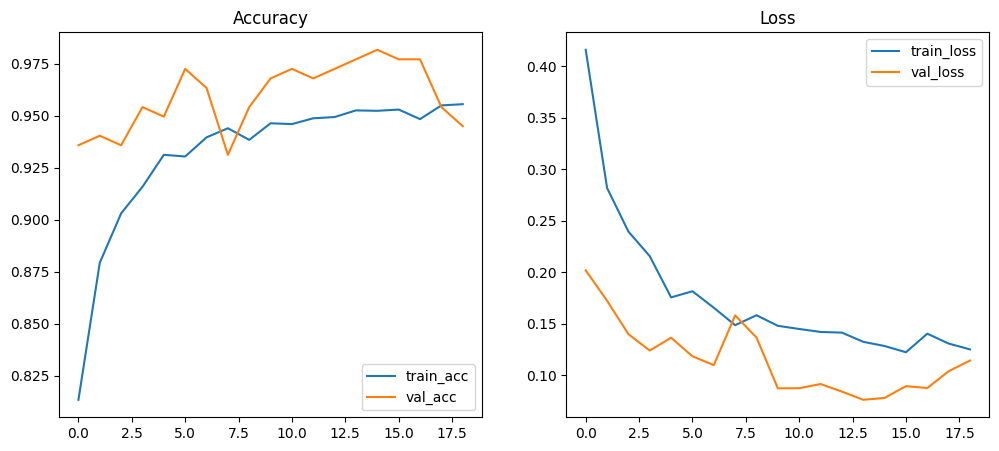

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.show()


In [ ]:
test_loss, test_acc, test_recall, test_precision = cnn_model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Recall: {test_recall:.4f}, Precision: {test_precision:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.7936 - loss: 0.7237 - precision: 0.4522 - recall: 0.6509
Test Accuracy: 0.8654, Recall: 0.9795, Precision: 0.8341


Transfer Learning

In [ ]:
# ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(224,224,3))  # Pretrained needs RGB
for layer in base_model.layers:
    layer.trainable = False  # freeze backbone

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=base_model.input, outputs=preds)
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
train_gen_rgb = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary'
)
val_gen_rgb = val_test_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)
test_gen_rgb = val_test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

history_resnet = resnet_model.fit(
    train_gen_rgb,
    validation_data=val_gen_rgb,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

Found 5014 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step - accuracy: 0.7042 - loss: 0.6202 - precision_1: 0.7382 - recall_1: 0.9260 - val_accuracy: 0.5459 - val_loss: 0.6734 - val_precision_1: 0.5459 - val_recall_1: 1.0000
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 115s 733ms/step - accuracy: 0.7499 - loss: 0.5296 - precision_1: 0.7526 - recall_1: 0.9940 - val_accuracy: 0.5505 - val_loss: 0.6492 - val_precision_1: 0.5484 - val_recall_1: 1.0000
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 739ms/step - accuracy: 0.7472 - loss: 0.4929 - precision_1: 0.7495 - recall_1: 0.9882 - val_accuracy: 0.5963 - val_loss: 0.5900 - val_precision_1: 0.5749 - val_recall_1: 1.0000
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 736ms/step - accuracy: 0.7803 - loss: 0.4538 - precision_1: 0.7891 - recall_1: 0.9672 - val_accuracy: 0.6009 - val_loss: 0.6076 - val_precision_1: 0.5777 - val_recal

In [ ]:
for layer in base_model.layers[-30:]:  # last 30 layers
    layer.trainable = True

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                     loss='binary_crossentropy',
                     metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

history_fine = resnet_model.fit(train_gen_rgb, validation_data=val_gen_rgb, epochs=5)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 151s 839ms/step - accuracy: 0.7570 - loss: 0.4928 - precision_2: 0.8669 - recall_2: 0.7731 - val_accuracy: 0.4541 - val_loss: 0.7124 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 747ms/step - accuracy: 0.8979 - loss: 0.2396 - precision_2: 0.9607 - recall_2: 0.9005 - val_accuracy: 0.9174 - val_loss: 0.4028 - val_precision_2: 0.8915 - val_recall_2: 0.9664
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 750ms/step - accuracy: 0.9035 - loss: 0.2546 - precision_2: 0.9477 - recall_2: 0.9233 - val_accuracy: 0.9358 - val_loss: 0.1565 - val_precision_2: 0.9487 - val_recall_2: 0.9328
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 119s 756ms/step - accuracy: 0.9142 - loss: 0.1989 - precision_2: 0.9583 - recall_2: 0.9261 - val_accuracy: 0.9174 - val_loss: 0.1831 - val_precision_2: 0.9810 - val_recall_2: 0.8655
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 120s 764ms/step - accuracy: 0.9355 - loss: 0.1928 - precision_2: 0.96

In [ ]:
test_loss, test_acc, test_recall, test_precision = resnet_model.evaluate(test_gen_rgb)
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}, Recall: {test_recall:.4f}, Precision: {test_precision:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 544ms/step - accuracy: 0.5686 - loss: 1.5942 - precision_2: 0.3640 - recall_2: 0.6555
Transfer Learning Test Accuracy: 0.7564, Recall: 0.9872, Precision: 0.7237


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import (
    EfficientNetB0,
    DenseNet121
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Base directories
train_dir = '/content/drive/MyDrive/archive/chest_xray/chest_xray/train'
val_dir   = '/content/drive/MyDrive/archive/chest_xray/chest_xray/val'
test_dir  = '/content/drive/MyDrive/archive/chest_xray/chest_xray/test'

IMG_SIZE = 224    # EfficientNet & DenseNet expect 224×224 RGB
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary'
)
val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)
test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)


Found 5014 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


EfficientNetB0 Transfer Learning

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load base EfficientNetB0
base_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_eff.layers:
    layer.trainable = False   # freeze backbone

# Add custom head
x = base_eff.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)

eff_model = Model(inputs=base_eff.input, outputs=out)

eff_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

eff_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/capstone_models/efficientnet_b0.h5', save_best_only=True)
]

history_eff = eff_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7349 - loss: 0.5944 - precision_3: 0.7484 - recall_3: 0.9689

157/157 ━━━━━━━━━━━━━━━━━━━━ 183s 981ms/step - accuracy: 0.7350 - loss: 0.5943 - precision_3: 0.7485 - recall_3: 0.9691 - val_accuracy: 0.5459 - val_loss: 0.7819 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 748ms/step - accuracy: 0.7524 - loss: 0.5728 - precision_3: 0.7524 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.8021 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 748ms/step - accuracy: 0.7459 - loss: 0.5764 - precision_3: 0.7459 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.7857 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.7521 - loss: 0.5708 - precision_3: 0.7521 - recall_3: 1.0000

157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 747ms/step - accuracy: 0.7521 - loss: 0.5708 - precision_3: 0.7521 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.7795 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7613 - loss: 0.5584 - precision_3: 0.7613 - recall_3: 1.0000

157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 742ms/step - accuracy: 0.7613 - loss: 0.5585 - precision_3: 0.7613 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.7380 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 718ms/step - accuracy: 0.7525 - loss: 0.5732 - precision_3: 0.7525 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.8267 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 718ms/step - accuracy: 0.7543 - loss: 0.5655 - precision_3: 0.7543 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.7655 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 720ms/step - accuracy: 0.7441 - loss: 0.5793 - precision_3: 0.7441 - recall_3: 1.0000 - val_accuracy: 0.5459 - val_loss: 0.8014 - val_precision_3: 0.5459 - val_recall_3: 1.0000
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 719ms/step - accuracy: 0.7475 - loss: 0.5737 - precision_3: 0.7475 - recall_3:

In [ ]:
test_loss, test_acc, test_recall, test_prec = eff_model.evaluate(test_gen)
print(f"EfficientNetB0 Test Accuracy: {test_acc:.4f}, Recall: {test_recall:.4f}, Precision: {test_prec:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 878ms/step - accuracy: 0.2984 - loss: 0.9423 - precision_3: 0.2984 - recall_3: 0.6667
EfficientNetB0 Test Accuracy: 0.6250, Recall: 1.0000, Precision: 0.6250


DenseNet121 Transfer Learning

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Load base DenseNet121
base_dense = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_dense.layers:
    layer.trainable = False

# Custom classification head
y = base_dense.output
y = GlobalAveragePooling2D()(y)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
out_dense = Dense(1, activation='sigmoid')(y)

dense_model = Model(inputs=base_dense.input, outputs=out_dense)

dense_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

dense_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,300,161 (27.85 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/capstone_models/densenet121.h5', save_best_only=True)
]

history_dense = dense_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.8228 - loss: 0.4203 - precision_4: 0.8715 - recall_4: 0.8945

157/157 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8232 - loss: 0.4194 - precision_4: 0.8718 - recall_4: 0.8947 - val_accuracy: 0.9266 - val_loss: 0.1798 - val_precision_4: 0.9187 - val_recall_4: 0.9496
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.9347 - loss: 0.1785 - precision_4: 0.9548 - recall_4: 0.9586

157/157 ━━━━━━━━━━━━━━━━━━━━ 122s 776ms/step - accuracy: 0.9347 - loss: 0.1785 - precision_4: 0.9548 - recall_4: 0.9586 - val_accuracy: 0.9266 - val_loss: 0.1393 - val_precision_4: 0.9813 - val_recall_4: 0.8824
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.9430 - loss: 0.1499 - precision_4: 0.9618 - recall_4: 0.9631

157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 774ms/step - accuracy: 0.9430 - loss: 0.1500 - precision_4: 0.9618 - recall_4: 0.9631 - val_accuracy: 0.9725 - val_loss: 0.1103 - val_precision_4: 0.9669 - val_recall_4: 0.9832
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.9452 - loss: 0.1384 - precision_4: 0.9615 - recall_4: 0.9655

157/157 ━━━━━━━━━━━━━━━━━━━━ 120s 764ms/step - accuracy: 0.9452 - loss: 0.1384 - precision_4: 0.9615 - recall_4: 0.9655 - val_accuracy: 0.9495 - val_loss: 0.1086 - val_precision_4: 0.9821 - val_recall_4: 0.9244
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 751ms/step - accuracy: 0.9425 - loss: 0.1445 - precision_4: 0.9590 - recall_4: 0.9655 - val_accuracy: 0.9404 - val_loss: 0.1235 - val_precision_4: 1.0000 - val_recall_4: 0.8908
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.9553 - loss: 0.1205 - precision_4: 0.9736 - recall_4: 0.9680

157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 769ms/step - accuracy: 0.9553 - loss: 0.1205 - precision_4: 0.9735 - recall_4: 0.9680 - val_accuracy: 0.9679 - val_loss: 0.0864 - val_precision_4: 0.9667 - val_recall_4: 0.9748
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 123s 782ms/step - accuracy: 0.9474 - loss: 0.1357 - precision_4: 0.9629 - recall_4: 0.9665 - val_accuracy: 0.9587 - val_loss: 0.0985 - val_precision_4: 1.0000 - val_recall_4: 0.9244
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 754ms/step - accuracy: 0.9571 - loss: 0.1183 - precision_4: 0.9711 - recall_4: 0.9714 - val_accuracy: 0.9404 - val_loss: 0.0964 - val_precision_4: 0.9732 - val_recall_4: 0.9160
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 750ms/step - accuracy: 0.9583 - loss: 0.1167 - precision_4: 0.9764 - recall_4: 0.9684 - val_accuracy: 0.9541 - val_loss: 0.0948 - val_precision_4: 0.9910 - val_recall_4: 0.9244
Epoch 10/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 745ms/step - accuracy: 0.9550 - loss: 0.1172 - precision_4: 0.9674 - recall_4

In [ ]:
test_loss, test_acc, test_recall, test_prec = dense_model.evaluate(test_gen)
print(f"DenseNet121 Test Accuracy: {test_acc:.4f}, Recall: {test_recall:.4f}, Precision: {test_prec:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 938ms/step - accuracy: 0.7700 - loss: 0.5746 - precision_4: 0.4527 - recall_4: 0.6531
DenseNet121 Test Accuracy: 0.8686, Recall: 0.9846, Precision: 0.8348


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 952ms/step


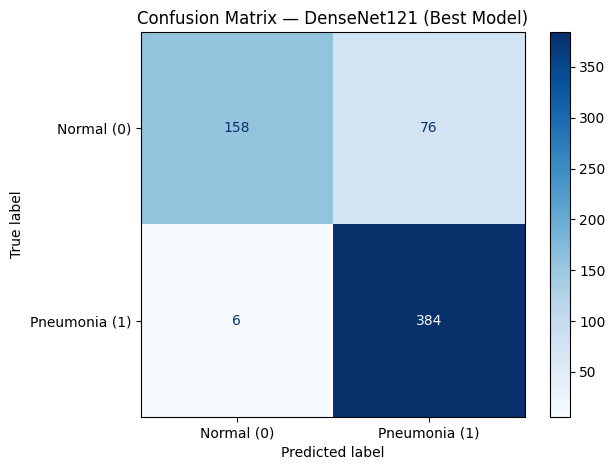

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
y_true = test_gen.classes
y_prob = dense_model.predict(test_gen).ravel()
y_pred = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal (0)', 'Pneumonia (1)']
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix — DenseNet121 (Best Model)')
plt.tight_layout()
plt.show()


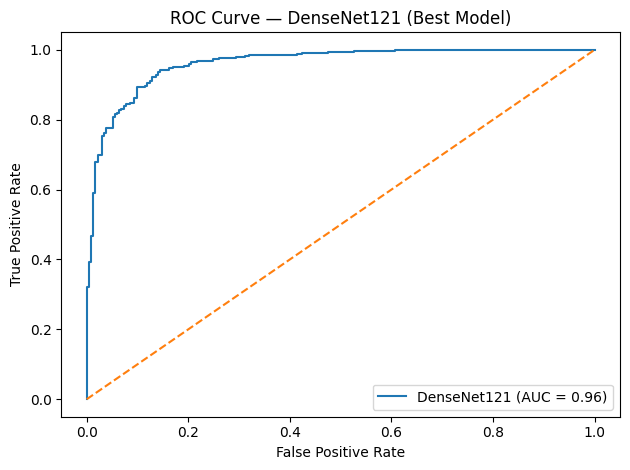

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'DenseNet121 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — DenseNet121 (Best Model)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Hyperparameter Tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/archive/chest_xray/chest_xray/train'
val_dir   = '/content/drive/MyDrive/archive/chest_xray/chest_xray/val'
test_dir  = '/content/drive/MyDrive/archive/chest_xray/chest_xray/test'

IMG_SIZE  = 224
BATCH     = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH, class_mode='binary'
)
val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH, class_mode='binary', shuffle=False
)
test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_SIZE, IMG_SIZE), color_mode='rgb',
    batch_size=BATCH, class_mode='binary', shuffle=False
)


Found 5014 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
!pip -q install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_cnn(hp):
    # tunables
    num_blocks   = hp.Int("num_blocks", 2, 4, default=3)
    base_filters = hp.Choice("base_filters", [16, 32, 48, 64], default=32)
    kernel_size  = hp.Choice("kernel_size", [3, 5], default=3)
    dropout      = hp.Choice("dropout", [0.3, 0.4, 0.5], default=0.5)
    dense_units  = hp.Choice("dense_units", [128, 192, 256], default=128)
    lr           = hp.Choice("lr", [1e-4, 3e-4, 1e-3], default=3e-4)

    inputs = layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = inputs
    for i in range(num_blocks):
        filters = base_filters * (2**i)
        x = layers.Conv2D(filters, kernel_size, padding="same", activation="relu")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(filters, kernel_size, padding="same", activation="relu")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
    )
    return model

tuner = kt.Hyperband(
    build_cnn,
    objective="val_accuracy",
    max_epochs=20,
    factor=3,
    directory="/content/kt_logs",
    project_name="cnn_tuning",
    seed=42,
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

tuner.search(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(1)[0]
best_cnn = tuner.hypermodel.build(best_hp)
history = best_cnn.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)

print("Best hyperparameters:")
for k,v in best_hp.values.items(): print(k, "=>", v)

print("Test metrics:")
print(best_cnn.evaluate(test_gen, verbose=1))


Trial 29 Complete [00h 00m 29s]

Best val_accuracy So Far: 0.9678899049758911
Total elapsed time: 05h 15m 13s
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 159s 931ms/step - accuracy: 0.8498 - loss: 0.6707 - precision_1: 0.8980 - recall_1: 0.9036 - val_accuracy: 0.5459 - val_loss: 8.1040 - val_precision_1: 0.5459 - val_recall_1: 1.0000
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 857ms/step - accuracy: 0.9343 - loss: 0.1730 - precision_1: 0.9584 - recall_1: 0.9550 - val_accuracy: 0.5459 - val_loss: 9.6486 - val_precision_1: 0.5459 - val_recall_1: 1.0000
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 848ms/step - accuracy: 0.9456 - loss: 0.1567 - precision_1: 0.9653 - recall_1: 0.9619 - val_accuracy: 0.5459 - val_loss: 5.4976 - val_precision_1: 0.5459 - val_recall_1: 1.0000
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 846ms/step - accuracy: 0.9471 - loss: 0.1341 - precision_1: 0.9647 - recall_1: 0.9646 - val_accuracy: 0.8532 - val_loss: 0.3650 - val_precision_1: 0.9888 - val_recall_1: 0.7395
Ep

GRAD-CAM and Classification report

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_val = val_gen.classes
p_val = best_cnn.predict(val_gen, verbose=0).ravel()

thresholds = np.linspace(0.3, 0.8, 26)  # try thresholds from 0.30 to 0.80

results = []

print("Threshold search on VALIDATION set:")
for t in thresholds:
    y_val_pred = (p_val >= t).astype(int)
    cm_val = confusion_matrix(y_val, y_val_pred)
    tn, fp, fn, tp = cm_val.ravel()
    rec_norm = tn / (tn + fp)
    rec_pneu = tp / (tp + fn)
    acc_val = (tn + tp) / cm_val.sum()
    results.append((t, acc_val, rec_norm, rec_pneu))
    print(f"t={t:.2f} | val_acc={acc_val:.3f} | "
          f"rec_normal={rec_norm:.3f} | rec_pneu={rec_pneu:.3f}")

candidates = [r for r in results if r[3] >= 0.95]
best_t, best_acc, best_rn, best_rp = max(candidates, key=lambda x: x[2])
print("\nChosen threshold based on validation set:")
print(f"t={best_t:.2f} | val_acc={best_acc:.3f} | "
      f"rec_normal={best_rn:.3f} | rec_pneu={best_rp:.3f}")

y_test = test_gen.classes
p_test = best_cnn.predict(test_gen, verbose=0).ravel()
y_test_pred = (p_test >= best_t).astype(int)

cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()
test_acc = (tn + tp) / cm_test.sum()
rec_norm_test = tn / (tn + fp)
rec_pneu_test = tp / (tp + fn)

print("\n=== Test metrics with tuned threshold ===")
print("Confusion matrix:\n", cm_test)
print(f"Test accuracy      : {test_acc:.3f}")
print(f"Normal recall      : {rec_norm_test:.3f}")
print(f"Pneumonia recall   : {rec_pneu_test:.3f}")

print("\nClassification report (test):")
print(classification_report(
    y_test, y_test_pred,
    target_names=["Normal","Pneumonia"],
    digits=4
))


Threshold search on VALIDATION set:
t=0.30 | val_acc=0.954 | rec_normal=0.909 | rec_pneu=0.992
t=0.32 | val_acc=0.954 | rec_normal=0.909 | rec_pneu=0.992
t=0.34 | val_acc=0.959 | rec_normal=0.919 | rec_pneu=0.992
t=0.36 | val_acc=0.959 | rec_normal=0.919 | rec_pneu=0.992
t=0.38 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.40 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.42 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.44 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.46 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.48 | val_acc=0.963 | rec_normal=0.929 | rec_pneu=0.992
t=0.50 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.52 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.54 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.56 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.58 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.60 | val_acc=0.968 | rec_normal=0.939 | rec_pneu=0.992
t=0.62 | val_acc=0.9

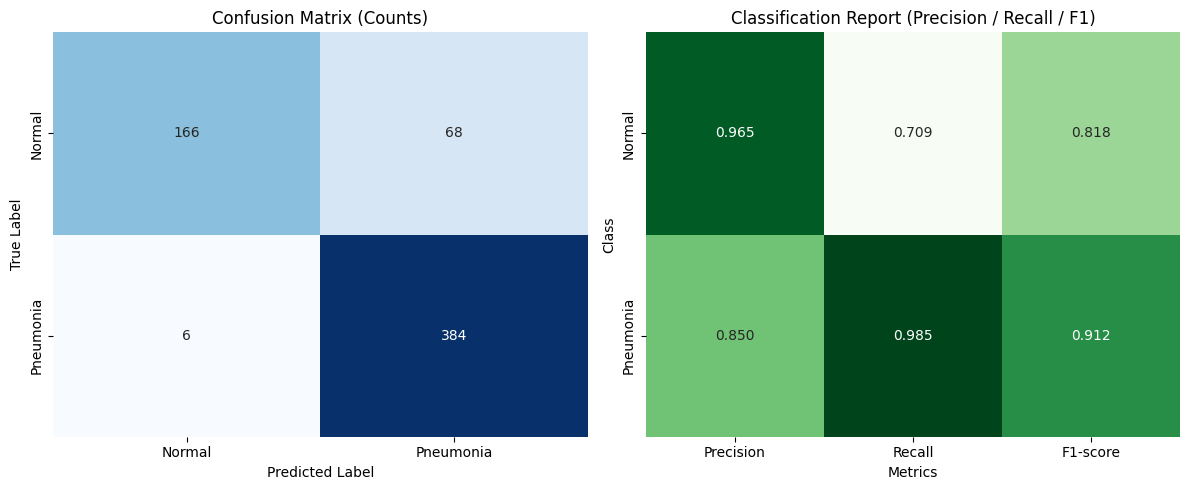

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Use the threshold-tuned predictions
cm = confusion_matrix(y_test, y_test_pred)
classes = ["Normal", "Pneumonia"]

# Normalize confusion matrix for heatmap clarity
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

rep = classification_report(
    y_test, y_test_pred,
    target_names=classes,
    output_dict=True,
    digits=4
)

metric_names = ["precision", "recall", "f1-score"]
metrics_mat = np.array([[rep[c][m] for m in metric_names] for c in classes])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    cm, annot=cm, fmt="d", cmap="Blues",
    xticklabels=classes, yticklabels=classes,
    cbar=False, ax=axes[0]
)
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(
    metrics_mat,
    annot=np.round(metrics_mat, 3),
    fmt=".3f",
    cmap="Greens",
    xticklabels=[m.capitalize() for m in metric_names],
    yticklabels=classes,
    cbar=False,
    ax=axes[1]
)
axes[1].set_title("Classification Report (Precision / Recall / F1)")
axes[1].set_xlabel("Metrics")
axes[1].set_ylabel("Class")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_last_conv_layer_name(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in model.")

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    max_val = tf.reduce_max(heatmap)
    if max_val > 0:
        heatmap /= max_val
    return heatmap.numpy()

def display_gradcam(model, img_path, last_conv_layer_name=None, title="Grad-CAM"):
    if last_conv_layer_name is None:
        last_conv_layer_name = get_last_conv_layer_name(model)

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img_arr = img_arr / 255.0
    input_arr = np.expand_dims(img_arr, axis=0)

    heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name)

    heatmap_resized = cv2.resize(heatmap, (IMG_SIZE, IMG_SIZE))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(np.uint8(img_arr * 255), 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_arr, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(overlay)
    plt.title(title)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


Showing some TRUE POSITIVES:


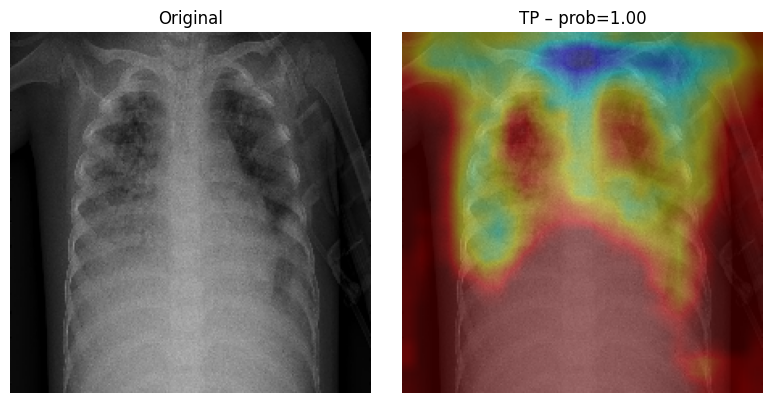

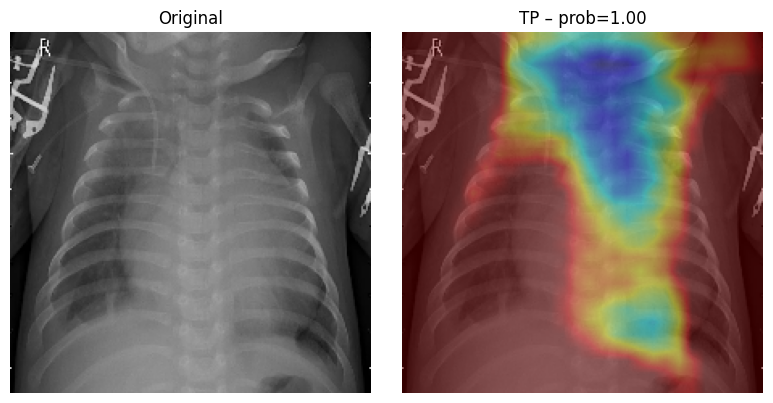

Showing some FALSE NEGATIVES:


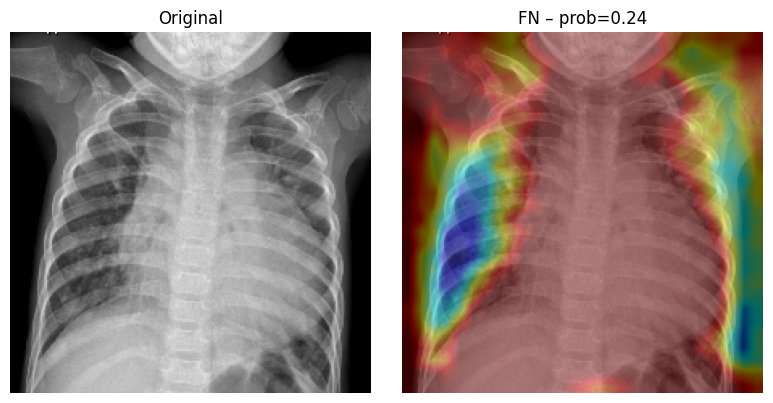

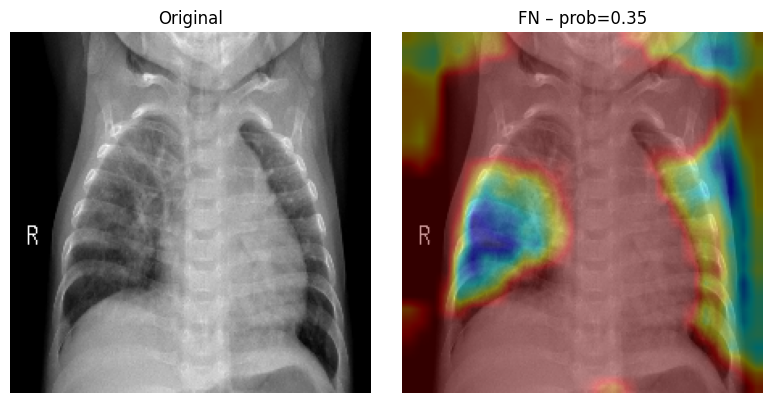

Showing some FALSE POSITIVES:


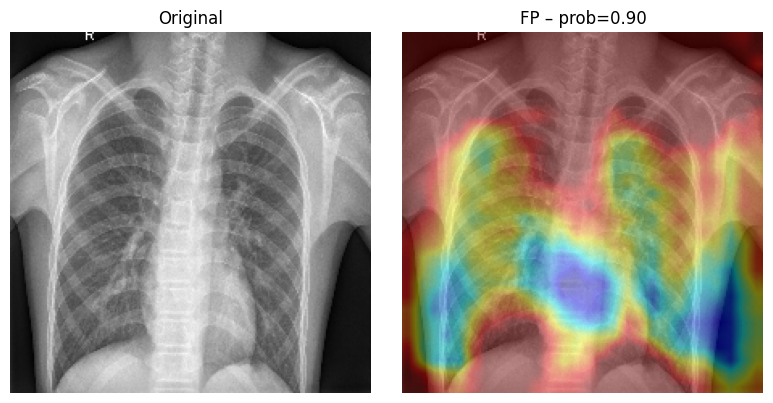

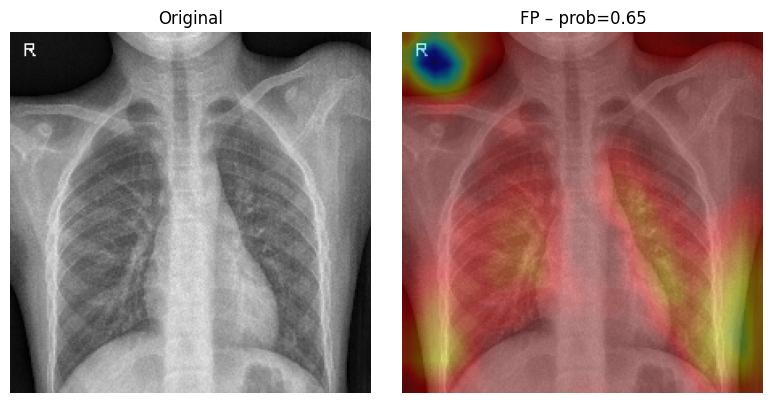

In [ ]:
#TP (Pneumonia correctly predicted)
#FN (Pneumonia missed)
#FP (Normal misclassified as Pneumonia)
import pandas as pd

paths = np.array(test_gen.filepaths)

df = pd.DataFrame({
    "path": paths,
    "true": y_true,
    "pred": y_pred,
    "prob": y_prob
})

tp = df[(df.true == 1) & (df.pred == 1)].sample(2, random_state=0)
fn = df[(df.true == 1) & (df.pred == 0)].head(2)
fp = df[(df.true == 0) & (df.pred == 1)].head(2)
print("Showing some TRUE POSITIVES:")
for _, row in tp.iterrows():
    display_gradcam(best_cnn, row["path"], title=f"TP – prob={row['prob']:.2f}")

print("Showing some FALSE NEGATIVES:")
for _, row in fn.iterrows():
    display_gradcam(best_cnn, row["path"], title=f"FN – prob={row['prob']:.2f}")

print("Showing some FALSE POSITIVES:")
for _, row in fp.iterrows():
    display_gradcam(best_cnn, row["path"], title=f"FP – prob={row['prob']:.2f}")


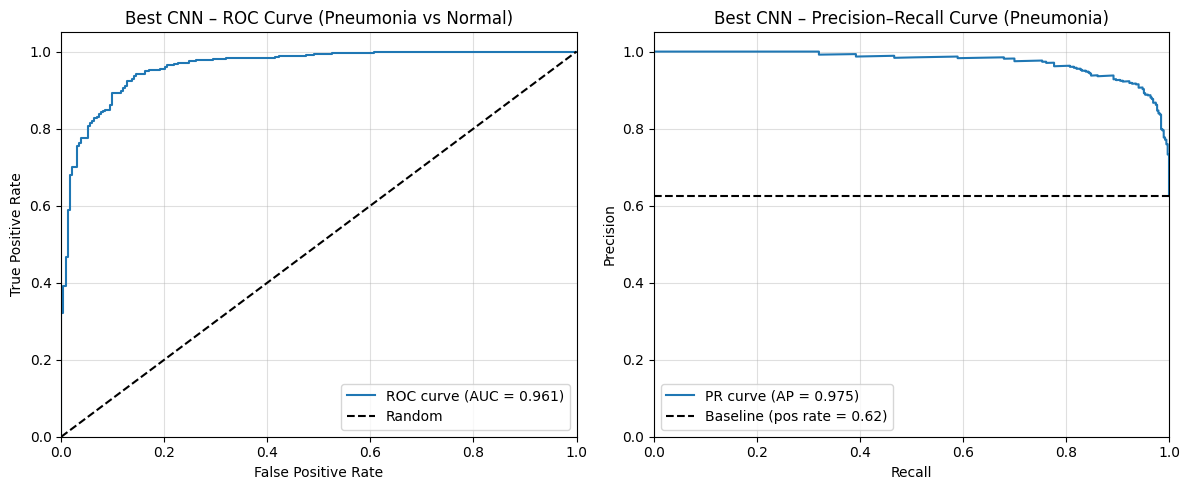

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)


# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Precision–Recall curve
prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = average_precision_score(y_true, y_prob)

plt.figure(figsize=(12,5))

# ROC subplot
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Best CNN – ROC Curve (Pneumonia vs Normal)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)

# PR subplot
plt.subplot(1,2,2)
plt.plot(rec, prec, label=f"PR curve (AP = {pr_auc:.3f})")
baseline = y_true.mean()  # prevalence of pneumonia
plt.hlines(baseline, 0, 1, colors="k", linestyles="--", label=f"Baseline (pos rate = {baseline:.2f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Best CNN – Precision–Recall Curve (Pneumonia)")
plt.legend(loc="lower left")
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


Evaluating models on TEST set...

  -> CNN (tuned)
  -> EfficientNetB0
  -> ResNet50

=== Model Accuracy Summary (Test Set) ===


model  accuracy
0     CNN (tuned)    0.8686
1  EfficientNetB0    0.6250
2        ResNet50    0.7564

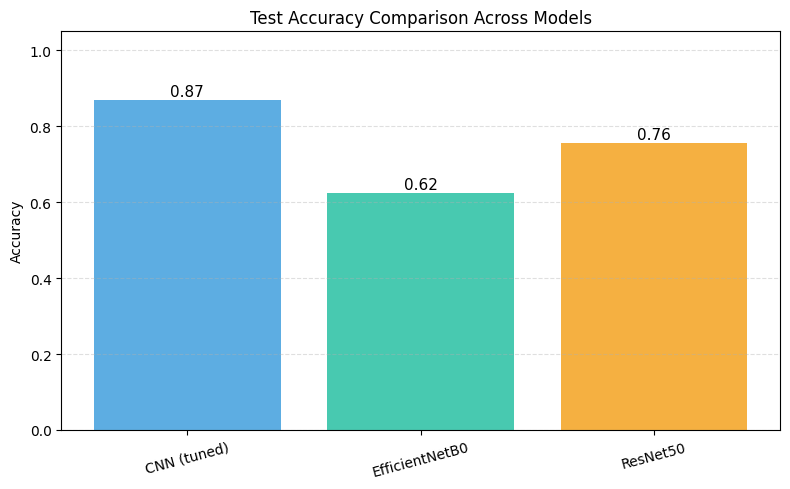

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

models = {
    "CNN (tuned)": dense_model,
    "EfficientNetB0": eff_model,
    "ResNet50": resnet_model,
}

y_true = test_gen.classes

rows = []

print("Evaluating models on TEST set...\n")
for name, m in models.items():
    print("  ->", name)
    y_prob = m.predict(test_gen, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    rep = classification_report(
        y_true, y_pred,
        output_dict=True,
        zero_division=0
    )

    rows.append({
        "model": name,
        "accuracy": rep["accuracy"]
    })

summary_df = pd.DataFrame(rows)
print("\n=== Model Accuracy Summary (Test Set) ===")
display(summary_df.round(4))

plt.figure(figsize=(8,5))
plt.bar(summary_df["model"], summary_df["accuracy"], color=["#5DADE2", "#48C9B0", "#F5B041"])

for i, v in enumerate(summary_df["accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=11)

plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Test Accuracy Comparison Across Models")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()
